In [101]:
import pandas as pd
import numpy as np

In [102]:
clients_df = pd.read_csv(r'C:\Users\Franco Gabriel\Desktop\Programación\Ungarelli_muebles\um_clients.csv')
categories_df = pd.read_csv(r'C:\Users\Franco Gabriel\Desktop\Programación\Ungarelli_muebles\um_categories.csv')
articles_df = pd.read_csv(r'C:\Users\Franco Gabriel\Desktop\Programación\Ungarelli_muebles\um_articles.csv')

In [103]:
repairs_df = pd.read_csv(
    r'C:\Users\Franco Gabriel\Desktop\Programación\Ungarelli_muebles\um_repairs.csv',
    sep=',',
    on_bad_lines='skip',
    low_memory=False
)

In [104]:
clients_df.drop(columns=['email','created_at','updated_at'], inplace=True)
clients_df.isnull().sum()


id       0
name     0
phone    0
dtype: int64

In [105]:
repairs_df.drop(columns=['paymentSign'], inplace=True)
repairs_df.isnull().sum()

id              0
clientId        1
created_at      2
updated_at      2
description     2
job             2
price           2
comments       93
status          3
dtype: int64

In [106]:
articles_df.isnull().sum()

id              0
name            0
description     0
image           0
categoryId      0
premium         0
created_at      0
updated_at      0
modern         97
dtype: int64

In [107]:
repairs_df.columns

Index(['id', 'clientId', 'created_at', 'updated_at', 'description', 'job',
       'price', 'comments', 'status'],
      dtype='object')

In [108]:
repairs_df.job

0                                      Soldar estructura
1      Retapizar asiento,ruedas, chapòn, colocar aran...
2                       Cambiar cilindro y prolongaciòn.
3                                               Cilindro
4                                                 chapòn
                             ...                        
991                               Revisar y presupuestar
992      Revisar y presupuestar/ ver cilindros se bajan.
993                               Revisar y presupuestar
994                               Revisar y presupuestar
995                             Cambiar ruedas y ajustar
Name: job, Length: 996, dtype: object

In [109]:
repairs_df.description

0                            Silla 8500 , 4 patas, azul
1                       Sillon gerencial mediano, negro
2      Silla tipo Tyson violeta/ agregar prolong. $ 500
3                                      Silla Ergo negra
4                  Silla tipo Rody alta color roja tela
                             ...                       
991                                  2 bases neumaticas
992                    3  Silla tipo   7010 " c/apoyas"
993                    Silla cajera sin apoyas  7010 ""
994                     Sillòn gamer rojo y negro Iqual
995                     Silla NV 5  verde musgoc/apoyas
Name: description, Length: 996, dtype: object

In [110]:
repairs_df.created_at

0      2021-06-16 23:33:47
1      2021-06-17 17:14:28
2      2021-06-17 19:10:57
3      2021-06-17 19:14:12
4      2021-06-18 15:00:37
              ...         
991    2023-10-31 16:17:51
992    2023-10-31 17:41:55
993    2023-10-31 18:38:25
994    2023-10-31 18:45:41
995    2023-11-02 16:33:01
Name: created_at, Length: 996, dtype: object

In [111]:
repairs_df.price

0        1700.0
1        8450.0
2        3600.0
3        3000.0
4        2000.0
         ...   
991     45800.0
992    106300.0
993     61300.0
994     22300.0
995      9000.0
Name: price, Length: 996, dtype: float64

In [112]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Franco
[nltk_data]     Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Franco
[nltk_data]     Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Franco
[nltk_data]     Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [113]:
#In the next few steps, I will be extracting key-words from repairs_df.job and repairs_df.description:

from sklearn.feature_extraction.text import TfidfVectorizer
import re

stop_words = set(stopwords.words('spanish'))

In [114]:
def text_preprocessing(text):
    if pd.isna(text):  # Verification if text is NaN
        return ''
    tokens = word_tokenize(text.lower())  # Convierte a minúsculas y tokeniza
    tokens = [word for word in tokens if word.isalpha()]  # Elimina números y símbolos
    tokens = [word for word in tokens if word not in stop_words]  # Elimina stopwords
    return ''.join(tokens)

In [115]:
X_rep_job = repairs_df['job'].apply(text_preprocessing)
X_rep_desc = repairs_df['description'].apply(text_preprocessing)

In [116]:
vectorizer = TfidfVectorizer()
vectorizer_2 = TfidfVectorizer()
X_job_vd = vectorizer.fit_transform(X_rep_job)
X_desc_vd = vectorizer_2.fit_transform(X_rep_desc)

In [117]:
words_job = vectorizer.get_feature_names_out()
words_desc = vectorizer_2.get_feature_names_out()

scores_1 = X_job_vd.toarray()
scores_2 = X_desc_vd.toarray()

In [118]:
#Dataframe with key-words:

keywords_job = pd.DataFrame(scores_1, columns=words_job)
keywords_desc = pd.DataFrame(scores_2, columns=words_desc)

In [119]:
keywords_job.tail()

,ajustarapoyabrazos,ajustarapoyasrellenarasientocotizartapizadocompletorevisar,ajustarrevisar,ajustarruedas,armar,armarbasecompletacuadradoestrellachica,armarcolocarruedastrajo,aronuevoruedasalmasoldartcontacto,arreglarasiento,bajarcmmsacararocajeroquedecmmenos,...,vercontactotapizadoasiento,vercuaderno,verestrellapresup,verfaltapago,verganchosrespaldo,verpolitapizadoòfranjaasiento,verrellenobultorevisarchapòncilindro,verrespaldo,verretapizadocolor,verruedaschapòn
991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
keywords_desc.isnull().sum()

almablanca                                                                                                     0
apoyabrazos                                                                                                    0
asientoalmaasientorodyrespaldoindiamesh                                                                        0
asientocuerotexbaige                                                                                           0
asientogamerverdenegro                                                                                         0
                                                                                                              ..
tipoturinbasictapizadoblanconegraapoyassillatiponegrasolopartearribacilindro                                   0
tipotysonnegracajeraovalina                                                                                    0
totalsillassillasoperativatiporednegrascuatroapoyassillatipocandycapoyasnegracsillatipocandyapoy

In [121]:
keywords_job['total_score'] = keywords_job.sum(axis=1) 
top25_keywords_job = keywords_job.nlargest(25, 'total_score')  # Obtain the top 25 from repairs_df.job, refferinng to keywords

keywords_desc['total_score'] = keywords_desc.sum(axis=1)
top25_keywords_desc = keywords_desc.nlargest(25, 'total_score') # Obtain the top 25 from repairs_df.description, reffering to keywords

In [122]:
top25_keywords_desc.columns

Index(['almablanca', 'apoyabrazos', 'asientoalmaasientorodyrespaldoindiamesh',
       'asientocuerotexbaige', 'asientogamerverdenegro',
       'asientogerencialgrisapoyasbasecromada', 'asientonegro',
       'asientorespaldosillafija', 'asientosillanegra', 'asientosillar',
       ...
       'tipoimperiaaltanegro', 'tiporodybajabeigeapoyas', 'tipotrentocromado',
       'tipotrentomorado',
       'tipoturinbasictapizadoblanconegraapoyassillatiponegrasolopartearribacilindro',
       'tipotysonnegracajeraovalina',
       'totalsillassillasoperativatiporednegrascuatroapoyassillatipocandycapoyasnegracsillatipocandyapoyasnegrafija',
       'turìnbasic', 'volviòtraersillaanteriorenganchetelamesh',
       'total_score'],
      dtype='object', length=760)

Text(0.5, 1.0, 'Elbow Method for Optimal k')

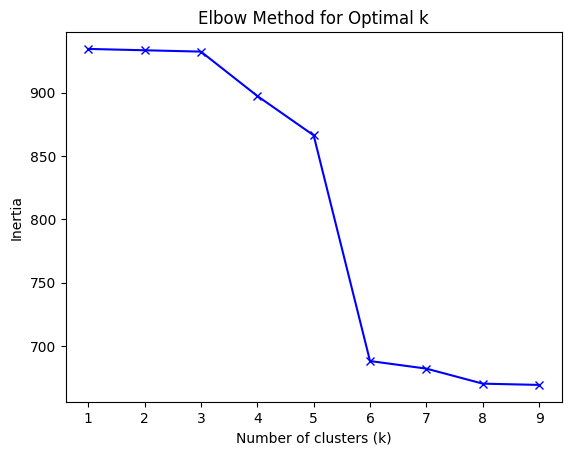

In [123]:
#The target of the following steps is to create a clustering model in order to associate the keywords with their respective kind of made work,
#so a price can be predicted by this clustering:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#I'm going to apply the Elbow Method, which is a way to identify which is the best k (optimal number of clusters):

inertia = [] #Inertia is the measure of the sum of cuadratic distance among the clusters, depending on k-value.
K_range = range(1, 10) #k-values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(keywords_job)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

In [124]:
#As it is shown in the figure above, the optimal value for k is k=3 (where the elbow appears, or inflection point).
#So, I will keep working with k=3:
k = 6 #Number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fitting the KMeans model:
kmeans.fit(keywords_job)

repairs_df['cluster'] = kmeans.labels_
repairs_df.cluster

0      5
1      5
2      5
3      5
4      5
      ..
991    1
992    5
993    1
994    1
995    5
Name: cluster, Length: 996, dtype: int32

Text(0.5, 1.0, 'Elbow Method for Optimal k')

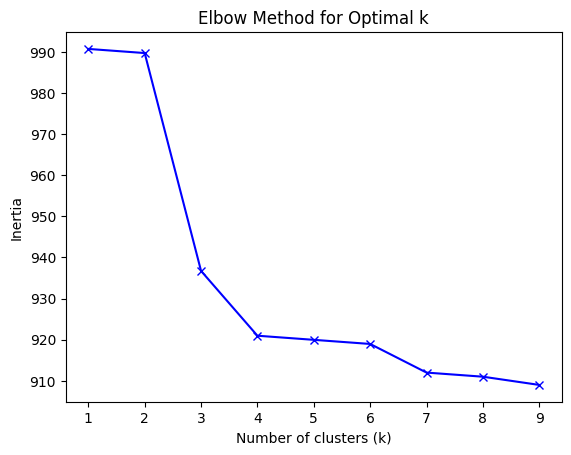

In [125]:
#In order to find better patterns, considering the repairs_df.description keywords might be very useful, so the process will be repeated
#for this variable:

inertia_desc = [] #Inertia is the measure of the sum of cuadratic distance among the clusters, depending on k-value.
K_range_desc = range(1, 10) #k-values
for k in K_range_desc:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(keywords_desc)
    inertia_desc.append(kmeans.inertia_)

plt.plot(K_range_desc, inertia_desc, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

In [126]:
#In this case, the elbow shown by the figure above is more sutile, but we can go for k=4 or trying others methods to find the best -value:
k_2 = 4 #Number of clusters
kmeans_2 = KMeans(n_clusters=k_2, random_state=42)

# Fitting the KMeans model:
kmeans_2.fit(keywords_desc)

repairs_df['cluster_desc'] = kmeans_2.labels_
repairs_df.cluster_desc

0      3
1      3
2      3
3      3
4      3
      ..
991    3
992    3
993    3
994    3
995    3
Name: cluster_desc, Length: 996, dtype: int32

In [127]:
top_words_per_cluster = []
feature_names = vectorizer.get_feature_names_out()
num_features = len(feature_names)  # Cantidad de palabras en el vectorizer

for i in range(kmeans.n_clusters):
    cluster_center = kmeans.cluster_centers_[i]
    
    # Obtener índices de las 5 palabras principales del cluster
    top_keywords_idx = np.argsort(cluster_center)[-5:]
    
    # Limitar índices a la cantidad de características disponibles
    top_keywords_idx = [idx for idx in top_keywords_idx if idx < num_features]
    
    # Obtener las palabras clave para estos índices
    top_keywords = feature_names[top_keywords_idx]
    top_words_per_cluster.append(top_keywords)

print("Palabras clave principales por cluster en 'job':")
for idx, keywords in enumerate(top_words_per_cluster):
    print(f"Cluster {idx}: {keywords}")


Palabras clave principales por cluster en 'job':
Cluster 0: ['pegartapizado' 'ponerbotonesasientoruedascilindro'
 'internoinsertosretapizarrellenarasiento' 'verrespaldo']
Cluster 1: ['cambiarcilindroruedas']
Cluster 2: ['cambiarchapóncambiarcilindro']
Cluster 3: ['presupuestarbasculanteretaplateralesrevisar'
 'presupuestòretapizadoalmohadònaltadensidadverruedas'
 'internomaderainsertosrellenarretapizarasiento'
 'cambiocilindroestrellachica']
Cluster 4: ['colocarestrellacromadaruedaspintararo']
Cluster 5: ['repararinsertoapoyabderechotornillobasculante' 'cortarsoldarchapòn'
 'cambiarchaponcomunponerversisuplementarcilindrocambiarchapón']
Cluster 6: ['pegartapizado' 'ponerbotonesasientoruedascilindro'
 'intercambiarcilindro' 'revisarinclinacionrelleno']
Cluster 7: ['ponerbotonesasientoruedascilindro'
 'presupuestarbasculanteretaplateralesrevisar' 'rehacer' 'rellenarasiento']
Cluster 8: ['ponerbotonesasientoruedascilindro'
 'presupuestarbasculanteretaplateralesrevisar' 'fijarcarcazarespal

In [128]:
top_words_per_cluster = []
feature_names = vectorizer_2.get_feature_names_out()
num_features = len(feature_names)  # Cantidad de palabras en el vectorizer

for i in range(kmeans_2.n_clusters):
    cluster_center = kmeans_2.cluster_centers_[i]
    
    # Obtener índices de las 5 palabras principales del cluster
    top_keywords_idx = np.argsort(cluster_center)[-5:]
    
    # Limitar índices a la cantidad de características disponibles
    top_keywords_idx = [idx for idx in top_keywords_idx if idx < num_features]
    
    # Obtener las palabras clave para estos índices
    top_keywords = feature_names[top_keywords_idx]
    top_words_per_cluster.append(top_keywords)

print("Palabras clave principales por cluster en 'description':")
for idx, keywords in enumerate(top_words_per_cluster):
    print(f"Cluster {idx}: {keywords}")


Palabras clave principales por cluster en 'description':
Cluster 0: ['sillaindiagriscromada' 'sillaindianegra' 'sillagristipobasculantepagado'
 'sillatipoturincabezalnegrasbasescromadascuit']
Cluster 1: ['sillòncchiconegro' 'baseneumàticabasculante' 'sillòngerencialnegro'
 'sillongerencialnegro']
Cluster 2: ['sillòngerencialcromado' 'sillonesaluminioalto' 'basecromada'
 'sillòngerencialnegro']
Cluster 3: ['sillongerencialnegrocromado' 'sillacandyoperative' 'sillònmeshcromado'
 'sillòncchiconegro']


In [129]:
repairs_df.columns

Index(['id', 'clientId', 'created_at', 'updated_at', 'description', 'job',
       'price', 'comments', 'status', 'cluster', 'cluster_desc'],
      dtype='object')

In [130]:
#In this cell, I create the corresponding US dolars-ARS pesos dictionary, to express correctly the given price in the dataframe in US dollars:
USD_dict ={'2021':[148,141,136,145,152,163,175.5,176.5,182,193.5,197.5,204],
           '2022':[209,207,196,196.50,201,234,286,285,284,286,310,342],
           '2023':[379,373,388,462,485,489,545,725,790,870,855,975]}

In [131]:
USD_dict['2021'][3]

145

In [132]:
repairs_df['created_at'] = repairs_df['created_at'].astype(str)
repairs_df['usd_price'] = 0.0  
for index, date in enumerate(repairs_df['created_at']):
    year = date[:4]
    
    if year == '2021':
        month = date[6:7]
        num_month = int(month)
        repairs_df.loc[index,'usd_price'] = USD_dict['2021'][num_month-1]
    elif year == '2022':
        month = date[6:7]
        num_month = int(month)
        repairs_df.loc[index,'usd_price'] = USD_dict['2022'][num_month-1]
    elif year == '2023':
        month = date[6:7]
        num_month = int(month)
        repairs_df.loc[index, 'usd_price'] = USD_dict['2023'][num_month-1]
repairs_df['usd_price']

0      163.0
1      163.0
2      163.0
3      163.0
4      163.0
       ...  
991    975.0
992    975.0
993    975.0
994    975.0
995    379.0
Name: usd_price, Length: 996, dtype: float64

In [133]:
#In this cell, the prices previously given in $ARS are changed to usd dollars.
repairs_df['price(usd)'] = 0.0

for index, usd_price in enumerate(repairs_df['usd_price']):
    repairs_df.loc[index, 'price(usd)'] = round(repairs_df.loc[index, 'price']/usd_price, 2)
repairs_df['price(usd)']

0       10.43
1       51.84
2       22.09
3       18.40
4       12.27
        ...  
991     46.97
992    109.03
993     62.87
994     22.87
995     23.75
Name: price(usd), Length: 996, dtype: float64

In [134]:
#Target: price(usd)
#Features: cluster_job, cluster_desc
features = ['cluster_job','cluster_desc']
repairs_df = repairs_df.rename(columns={'cluster':'cluster_job'})
repairs_df.columns

Index(['id', 'clientId', 'created_at', 'updated_at', 'description', 'job',
       'price', 'comments', 'status', 'cluster_job', 'cluster_desc',
       'usd_price', 'price(usd)'],
      dtype='object')

In [135]:
from sklearn.model_selection import train_test_split

X = repairs_df[features].copy()
y = repairs_df['price(usd)'].copy()
y = y.fillna(y.mean()) #This imputation may look very arbitrary, but there were just 2 Nan values with no trace of error.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.2, random_state = 1)

In [136]:
#Since I am working with the clustering results, there are no categorical variables, and null values were transformed before reaching
#this point, so we can create a Pipeline with our numerical variables:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_transformer = SimpleImputer(strategy = 'constant')
preprocessor = ColumnTransformer(transformers = [('num',StandardScaler(),X_train.columns)])

In [137]:
#Definition of the model:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 7)

In [138]:
print(X_train.size,'\n',y_train.size)

398 
 199


In [139]:
from sklearn.metrics import mean_absolute_error
my_pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                              ('model', model)])
my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_valid)
score = mean_absolute_error(y_valid,preds)


In [140]:
#Cross-validation:
from sklearn.model_selection import cross_val_score
#We got to multiply by -1 since sklearn calculates negative MAE
score = -1*cross_val_score(my_pipeline, X, y, cv=6, scoring = 'neg_mean_absolute_error')
score

array([24.75973662, 25.06801118, 20.40881169, 22.1530431 , 23.94292107,
       21.75987249])

In [141]:
#The results obtained show a lack of consistency, which is given by the struggle in getting the keywords correctly. So the strategy for the following
# step is to apply a better method to recognize keywords.
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer

repairs_df['cleaned_job'] = repairs_df['job'].apply(text_preprocessing)
repairs_df['cleaned_desc'] = repairs_df['description'].apply(text_preprocessing)


repairs_df['cleaned_job'] = repairs_df['cleaned_job'].apply(lambda x: x.split() if isinstance(x, str) else (x if isinstance(x, list) else []))
repairs_df['cleaned_desc'] = repairs_df['cleaned_desc'].apply(lambda x: x.split() if isinstance(x, str) else (x if isinstance(x, list) else []))

# Eliminar filas vacías si es necesario
repairs_df = repairs_df[repairs_df['cleaned_job'].apply(bool)]
repairs_df = repairs_df[repairs_df['cleaned_desc'].apply(bool)]

#Create a bag of words:
#1st create a dicitonary:
dictionary_desc = corpora.Dictionary(repairs_df['cleaned_desc'])
dictionary_job = corpora.Dictionary(repairs_df['cleaned_job'])

# 2nd step is to create every word as a bag of words:
corpus_desc = [dictionary_desc.doc2bow(text) for text in repairs_df['cleaned_desc']]
corpus_job = [dictionary_job.doc2bow(text) for text in repairs_df['cleaned_job']]


In [142]:
#Training the model:
num_topics = 5  # Ajusta según lo que encuentres más útil
lda_model_desc = gensim.models.LdaModel(corpus_desc, num_topics=num_topics, id2word=dictionary_desc, passes=10)
lda_model_job = gensim.models.LdaModel(corpus_job, num_topics=num_topics, id2word=dictionary_job, passes=10)
topics_desc = lda_model_desc.print_topics(num_words=10)
topics_job = lda_model_job.print_topics(num_words=10)

In [143]:
for index, topic in topics_desc:
    print(f"Topic desc {index}: {topic}")

Topic desc 0: 0.021*"sillacandy" + 0.021*"basebasculantenegra" + 0.018*"sillarodyaltanegra" + 0.018*"basecromada" + 0.012*"sillaergonegra" + 0.012*"sillanegra" + 0.009*"sillachinanegraapoyas" + 0.009*"sillatiporodynegra" + 0.009*"sillaneum" + 0.007*"sillacandynegra"
Topic desc 1: 0.016*"sillóngerencialnegro" + 0.010*"sillarodybaja" + 0.007*"gamernegrorojo" + 0.007*"sillòngamernegro" + 0.007*"sillacuerotexarena" + 0.007*"baseneumatica" + 0.007*"candy" + 0.007*"sillatipored" + 0.007*"sillongammercoloruvadesarmado" + 0.007*"sillarodypremium"
Topic desc 2: 0.146*"sillongerencialnegro" + 0.034*"sillònmeshcromado" + 0.019*"sillònaluminioalto" + 0.019*"sillacajeraapoyas" + 0.011*"sillachinanegra" + 0.008*"sillònmeshaltocromado" + 0.006*"sillòngamerrojonegro" + 0.006*"silla" + 0.006*"baseneumàticacober" + 0.003*"sillaergoapoyabrazosnegra"
Topic desc 3: 0.037*"sillòncchiconegro" + 0.015*"sillòncchico" + 0.009*"sillaalmaestnegra" + 0.009*"sillonesaluminioalto" + 0.009*"sillatipocandycromadaapoya

In [144]:
for index, topic in topics_job:
    print(f"\n Topic_job {index}: {topic}")


 Topic_job 0: 0.058*"cilindrorevisar" + 0.055*"cambiarestrella" + 0.051*"revisaravisar" + 0.026*"cambiarbasculante" + 0.019*"colocarestrellamediana" + 0.012*"revisarpresupuestartapizadoecocueronegro" + 0.012*"fijaralturamàximo" + 0.008*"armar" + 0.008*"cambioruedas" + 0.008*"revisarpresupuestarretapizado"

 Topic_job 1: 0.517*"revisarpresupuestar" + 0.016*"revisarcilindro" + 0.016*"revisarhacer" + 0.011*"vercuaderno" + 0.009*"cambiarestrellaruedas" + 0.009*"reparar" + 0.005*"cambiarcilindroreviso" + 0.005*"suplementarestrella" + 0.005*"colocarestrellamedianaruedas" + 0.005*"retapizarasientoecocueronegro"

 Topic_job 2: 0.110*"cambiarcilindro" + 0.088*"cilindro" + 0.023*"tapizadocompletoecocueronegro" + 0.015*"estrellachica" + 0.012*"cambiarcilindroruedas" + 0.008*"cambiarestrellatrajo" + 0.008*"chaponrevisar" + 0.008*"cambiarruedas" + 0.008*"cambiarcilindrobasculante" + 0.008*"colocarestrella"

 Topic_job 3: 0.124*"cambiocilindro" + 0.044*"revisar" + 0.044*"cambiarchapòn" + 0.022*"ret

In [145]:
#tema 0: estrella/colocar/cambiar/ruedas/
#tema 1: revisar/presupuestar/
#tema 2: cilindro/CAMBIAR/chapon/RUEDAS/CAMBIO/asiento/basculante
#tema 3: REVISAR/tapizado/respaldo
#tema 4: RETAPIZADO/negro/ecocuero/asiento

In [238]:
#As we can see in the above cells, there's no a unique "candidate" to topic, it's still ambiguous. So, for the next steps, talking
#with the client is the best way to clearly define keywords, and then, being able to realise some correct and significant predictions.
#Repuetos más frecuentes: CILINDRO/BASCULANTE/CHAPÓN/RUEDAS /ARAÑA O ESTRELLA/ SOLDAR/ CANASTO/ RELLENAR ASIENTOS/ CAMBIAR TELA MESH
keywords = ['cilindro','basculante','chapón','ruedas','rueda','araña','estrella','soldar','canasto','rellenar','mesh','retapizar', 'silla', 'sillón']

def match_keywords(text, keywords):
    pattern = r'\b(' + '|'.join(re.escape(word) for word in keywords) + r')\b'
    matches = re.findall(pattern, text, re.IGNORECASE)  # Buscar todas las coincidencias (case insensitive)
    return list({match.capitalize() for match in matches})  # Retornar coincidencias únicas

In [239]:
repairs_df['description'] = repairs_df['description'].str.lower()
repairs_df.description

0                            silla 8500 , 4 patas, azul
1                       sillon gerencial mediano, negro
2      silla tipo tyson violeta/ agregar prolong. $ 500
3                                      silla ergo negra
4                  silla tipo rody alta color roja tela
                             ...                       
991                                  2 bases neumaticas
992                    3  silla tipo   7010 " c/apoyas"
993                    silla cajera sin apoyas  7010 ""
994                     sillòn gamer rojo y negro iqual
995                     silla nv 5  verde musgoc/apoyas
Name: description, Length: 988, dtype: object

In [240]:
repairs_df['matched_keywords'] = repairs_df['description'].apply(lambda x: match_keywords(x, keywords))

grouped_data = repairs_df.explode('matched_keywords').groupby('matched_keywords')

In [241]:
grouped_data.head()

,id,clientId,created_at,updated_at,description,job,price,comments,status,cluster_job,cluster_desc,usd_price,price(usd),cleaned_job,cleaned_desc,matched_keywords,matched_keywords_job
0,2,2,2021-06-16 23:33:47,2021-07-27 14:58:33,"silla 8500 , 4 patas, azul",Soldar estructura,1700.0,AVISADO X W APP 22/07/21,Entregada,5,3,163.0,10.43,[soldarestructura],[sillapatasazul],Silla,[Soldar]
2,4,4,2021-06-17 19:10:57,2021-07-28 17:19:44,silla tipo tyson violeta/ agregar prolong. $ 500,Cambiar cilindro y prolongaciòn.,3600.0,Avisada x w app,Entregada,5,3,163.0,22.09,[cambiarcilindroprolongaciòn],[sillatipotysonagregarprolong],Silla,[Cilindro]
3,5,5,2021-06-17 19:14:12,2021-06-22 19:47:23,silla ergo negra,Cilindro,3000.0,Avisado,Entregada,5,3,163.0,18.40,[cilindro],[sillaergonegra],Silla,[Cilindro]
4,6,6,2021-06-18 15:00:37,2021-07-02 19:04:19,silla tipo rody alta color roja tela,chapòn,2000.0,Chapòn solo,Entregada,5,3,163.0,12.27,[chapòn],[sillatiporodyaltacolorrojatela],Silla,[]
6,9,8,2021-06-19 16:20:34,2021-06-26 15:28:53,sillon tipo mesh,Cilindro y basculante,8070.0,Basculante: $4970 y cilindro $3100\r\nAVISADA,Entregada,5,3,163.0,49.51,[cilindrobasculante],[sillontipomesh],Mesh,"[Cilindro, Basculante]"
7,10,9,2021-06-22 13:17:55,2021-07-01 15:56:03,silla tipo red,"Colocar 4 tornillos c/arandela en respaldo, ab...",1100.0,Autorizò reparaciòn 25/06 x w app\r\nAVISADO ...,Entregada,5,3,163.0,6.75,[colocartornillosrespaldoabrircerrartapizadoco...,[sillatipored],Silla,[]
18,22,20,2021-06-26 15:55:53,2021-09-02 16:32:02,sillòn mesh cromado,Cilindro,3100.0,AVISADO X W APP 28/06,Entregada,5,3,163.0,19.02,[cilindro],[sillònmeshcromado],Mesh,[Cilindro]
23,27,25,2021-06-30 19:48:45,2021-08-18 16:24:52,sillòn mesh cromado,"Fabricar interno asiento c/insertos, abrir y c...",3500.0,Enviè w app 03/07/21\r\nAVISADO,Entregada,5,3,163.0,21.47,[fabricarinternoasientoabrircerrartapizado],[sillònmeshcromado],Mesh,[]
40,45,43,2021-07-13 17:32:43,2021-12-11 16:36:14,debe 2 cilindros $ 5000.- al 13/07/21/pagò $ 2...,Venta de repuestos,0.0,Precios a partir del 13/07/21 : cilindro $ 275...,Entregada,5,3,175.5,0.00,[ventarepuestos],[debecilindrosllevòtysoncompletosretirocilindr...,Ruedas,[]
40,45,43,2021-07-13 17:32:43,2021-12-11 16:36:14,debe 2 cilindros $ 5000.- al 13/07/21/pagò $ 2...,Venta de repuestos,0.0,Precios a partir del 13/07/21 : cilindro $ 275...,Entregada,5,3,175.5,0.00,[ventarepuestos],[debecilindrosllevòtysoncompletosretirocilindr...,Estrella,[]


In [242]:
grouped_data.matched_keywords.unique()

matched_keywords
Basculante    [Basculante]
Chapón            [Chapón]
Cilindro        [Cilindro]
Estrella        [Estrella]
Mesh                [Mesh]
Retapizar      [Retapizar]
Rueda              [Rueda]
Ruedas            [Ruedas]
Silla              [Silla]
Sillón            [Sillón]
Name: matched_keywords, dtype: object

In [243]:
grouped_data = grouped_data[['price(usd)','matched_keywords']]

In [244]:
grouped_data.count()

,price(usd),matched_keywords
matched_keywords,,
Basculante,29,29
Chapón,1,1
Cilindro,9,9
Estrella,28,28
Mesh,49,49
Retapizar,2,2
Rueda,2,2
Ruedas,15,15
Silla,471,471


In [245]:
grouped_data.size()

matched_keywords
Basculante     29
Chapón          1
Cilindro        9
Estrella       28
Mesh           49
Retapizar       2
Rueda           2
Ruedas         15
Silla         471
Sillón         20
dtype: int64

In [246]:
grouped_data.describe()

price(usd)                                                \
                      count       mean        std    min      25%     50%   
matched_keywords                                                            
Basculante             29.0  28.557241  15.393765   0.00  20.5500  27.030   
Chapón                  1.0  15.460000        NaN  15.46  15.4600  15.460   
Cilindro                9.0  21.222222  24.622984   0.00   0.0000  20.070   
Estrella               28.0  26.162500  27.102950   0.00   9.6400  17.360   
Mesh                   49.0  34.110204  38.249441   0.00  17.8300  24.360   
Retapizar               2.0  43.615000  61.680925   0.00  21.8075  43.615   
Rueda                   2.0   5.570000   7.877170   0.00   2.7850   5.570   
Ruedas                 15.0  27.799333  38.815479   0.00   5.4350  13.960   
Silla                 471.0  34.980594  38.038400   0.00  13.7000  25.690   
Sillón                 20.0  29.507000  22.745894   0.00   9.1175  26.730   

                                   
                      75%     max  
matched_keywords                   
Basculante        34.1800   75.85  
Chapón            15.4600   15.46  
Cilindro          33.8300   66.44  
Estrella          36.4650  102.07  
Mesh              38.3100  228.04  
Retapizar         65.4225   87.23  
Rueda              8.3550   11.14  
Ruedas            30.2350  134.01  
Silla             43.0750  314.94  
Sillón            40.0275   71.98

In [247]:
repairs_df['matched_keywords_job'] = repairs_df['job'].apply(lambda x: match_keywords(x, keywords))

grouped_data_job = (
    repairs_df
    .explode('matched_keywords_job')
    .groupby('matched_keywords_job')
    .apply(lambda x: x)  # Mantiene los datos originales
    .reset_index(drop=True)  # Resetea el índice
)

C:\Users\Franco Gabriel\AppData\Local\Temp\ipykernel_13052\1018544292.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  repairs_df


In [248]:
grouped_data_job.head()

,id,clientId,created_at,updated_at,description,job,price,comments,status,cluster_job,cluster_desc,usd_price,price(usd),cleaned_job,cleaned_desc,matched_keywords,matched_keywords_job
0,46,44,2021-07-13 19:03:59,2021-07-29 15:23:07,silla tipo candy operative negra,Estrella grande araña y ruedas,3400.0,Colocar estrella araña y 5 ruedas\r\nPAGADO,Entregada,5,3,175.5,19.37,[estrellagrandearañaruedas],[sillatipocandyoperativenegra],[Silla],Araña
1,9,8,2021-06-19 16:20:34,2021-06-26 15:28:53,sillon tipo mesh,Cilindro y basculante,8070.0,Basculante: $4970 y cilindro $3100\r\nAVISADA,Entregada,5,3,163.0,49.51,[cilindrobasculante],[sillontipomesh],[Mesh],Basculante
2,28,26,2021-07-01 15:52:10,2021-07-21 16:01:22,1 silla gerencial negra -- 1 silla operativa ...,"1 - Cilindro y ruedas 2- basculante, cilindro...",13670.0,Enviè w app 03/07/21 AUTORIZADO\r\nTerminada 1...,Entregada,5,3,175.5,77.89,[cilindroruedasbasculantecilindroruedas],[sillagerencialnegrasillaoperativared],[Silla],Basculante
3,29,27,2021-07-02 14:29:00,2021-07-27 20:03:55,1- sillon aluminio bajo 2.- sillon aluminio ...,"1- Cilindro, basculante y ruedas 2.- Cilindr...",18640.0,Con el tapizado no podemos hacer nada.\r\nEnvi...,Entregada,5,3,175.5,106.21,[cilindrobasculanteruedascilindrobasculanterue...,[sillonaluminiobajosillonaluminiobajo],[],Basculante
4,41,39,2021-07-12 14:25:15,2021-09-28 18:05:46,sillon gerencial bordo con pintas,Reparar inserto apoyab. derecho y tornillo bas...,1500.0,NaN,Entregada,5,3,175.5,8.55,[repararinsertoapoyabderechotornillobasculante],[sillongerencialbordopintas],[],Basculante


In [249]:
features_of_interest = ['created_at','job','price(usd)','matched_keywords_job']

In [250]:
df_initive = grouped_data_job[features_of_interest]
df_initive.head(30)

,created_at,job,price(usd),matched_keywords_job
0,2021-07-13 19:03:59,Estrella grande araña y ruedas,19.37,Araña
1,2021-06-19 16:20:34,Cilindro y basculante,49.51,Basculante
2,2021-07-01 15:52:10,"1 - Cilindro y ruedas 2- basculante, cilindro...",77.89,Basculante
3,2021-07-02 14:29:00,"1- Cilindro, basculante y ruedas 2.- Cilindr...",106.21,Basculante
4,2021-07-12 14:25:15,Reparar inserto apoyab. derecho y tornillo bas...,8.55,Basculante
5,2021-07-12 16:38:04,Sollas 1) y 3) fijar altura. Sillòn 2) Bascula...,88.89,Basculante
6,2021-08-12 17:22:13,"Ruedas, basculante y lubricar regulaciòn de al...",39.66,Basculante
7,2021-09-20 15:04:10,Cambiar basculante,35.71,Basculante
8,2021-09-27 14:51:20,Cambiar basculante y 1 rueda,31.87,Basculante
9,2021-10-06 19:09:55,Cambiar basculante con parker y cilindro y cuc...,41.86,Basculante


In [251]:
df_initive.to_csv(r'C:\Users\Franco Gabriel\UngarelliMuebles_job.csv', index=False)


In [252]:
keywords

['cilindro',
 'basculante',
 'chapón',
 'ruedas',
 'rueda',
 'araña',
 'estrella',
 'soldar',
 'canasto',
 'rellenar',
 'mesh',
 'retapizar',
 'silla',
 'sillón']

In [254]:
x0 = []
df_initive['combined_keywords'] = '' 

for index, string in enumerate(df_initive['job']):
    x0 = [] 
    for word in keywords:
        if word in string:
            x0.append(word)
    df_initive.loc[index, 'combined_keywords'] = ', '.join(x0)

print(df_initive['combined_keywords'])

C:\Users\Franco Gabriel\AppData\Local\Temp\ipykernel_13052\966138522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initive['combined_keywords'] = ''


0                     ruedas, rueda, araña
1                               basculante
2      cilindro, basculante, ruedas, rueda
3                basculante, ruedas, rueda
4                               basculante
                      ...                 
647                                 soldar
648                  ruedas, rueda, soldar
649                                       
650                                 soldar
651                                       
Name: combined_keywords, Length: 652, dtype: object


In [255]:
df_initive

,created_at,job,price(usd),matched_keywords_job,combined_keywords
0,2021-07-13 19:03:59,Estrella grande araña y ruedas,19.37,Araña,"ruedas, rueda, araña"
1,2021-06-19 16:20:34,Cilindro y basculante,49.51,Basculante,basculante
2,2021-07-01 15:52:10,"1 - Cilindro y ruedas 2- basculante, cilindro...",77.89,Basculante,"cilindro, basculante, ruedas, rueda"
3,2021-07-02 14:29:00,"1- Cilindro, basculante y ruedas 2.- Cilindr...",106.21,Basculante,"basculante, ruedas, rueda"
4,2021-07-12 14:25:15,Reparar inserto apoyab. derecho y tornillo bas...,8.55,Basculante,basculante
...,...,...,...,...,...
647,2023-06-15 15:04:50,Cortar y soldar chapòn nuevo,15.54,Soldar,soldar
648,2023-07-28 14:50:02,aro nuevo. ruedas alma. soldar T de contacto,43.12,Soldar,"ruedas, rueda, soldar"
649,2023-08-08 19:27:00,Soldar una pata. Reforzar las demas,0.00,Soldar,
650,2023-09-07 15:39:38,"Colocar apoyabrazos, soldar costado y rearmar",7.59,Soldar,soldar


In [259]:
df_initive.to_csv(r'C:\Users\Franco Gabriel\UngarelliMuebles_job.csv', index=False)